<a href="https://colab.research.google.com/github/Rafagars/Proyecto-1-Series-de-Tiempo-CO6344/blob/main/Proyecto_1_Serie_de_Tiempos_CO6344.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo SARIMA
Los datos contienen la producción de petróleo crudo mensual del estado de Texas desde Enero de 1981 hasta Julio de 2025.
Eventos externos que pueden haber afectado el modelo asociado a la producción:
* Boom del fracking a partir de 2012
* Pandemia 2020

Usando Rstudio:
* Para deducir el modelo tome los datos desde Enero de 2020 hasta Diciembre de 2024. Para medir el desempeño del modelo tome los datos desde Enero de 2025 hasta Julio 2025.
* Grafique los datos suministrados en formato de Series de Tiempo.
* Lleve a cabo un estudio completo de las series, aplicando logaritmo y/o diferenciación, de ser necesario, para transformar la serie en una estacionaria en media y varianza y sin estacionalidad.
* Proponga al menos dos modelos SARIMA para la serie y lleve a cabo una predicción desde Enero de 2020 hasta Diciembre de 2025.
* Estudie los errores de predicción usando los datos pertinentes y calcule las medida de desempeño para estas. Obtenga el mejor modelo basado en este criterio. Indique si este modelo es aconsejable para predecir la producción petrolera de Texas

In [ ]:
#Instalamos las librerias que vamos a necesitar
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
#Cargamos las librerias
library(ggplot2)
library(dplyr)
library(forecast)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
url <- "https://raw.githubusercontent.com/Rafagars/Proyecto-1-Series-de-Tiempo-CO6344/refs/heads/main/data/Texas_Field_Production_of_Crude_Oil.csv"
datos <- read.csv(url, skip = 4, header = TRUE)


In [ ]:
head(datos)

,Month,Texas.Field.Production.of.Crude.Oil.Thousand.Barrels
,<chr>,<int>
1,Jul 2025,179852
2,Jun 2025,171439
3,May 2025,177037
4,Apr 2025,172512
5,Mar 2025,175557
6,Feb 2025,158613


In [ ]:
tail(datos)

,Month,Texas.Field.Production.of.Crude.Oil.Thousand.Barrels
,<chr>,<int>
530,Jun 1981,77030
531,May 1981,79890
532,Apr 1981,77344
533,Mar 1981,80734
534,Feb 1981,72591
535,Jan 1981,80609


In [ ]:
oil_ts = ts(datos$Texas.Field.Production.of.Crude.Oil.Thousand.Barrels, frequency = 12, start = c(1981, 1))


In [ ]:
options(repr.plot.width = 14, repr.plot.height = 10) # Sets width to 14 inches, height to 10 inches

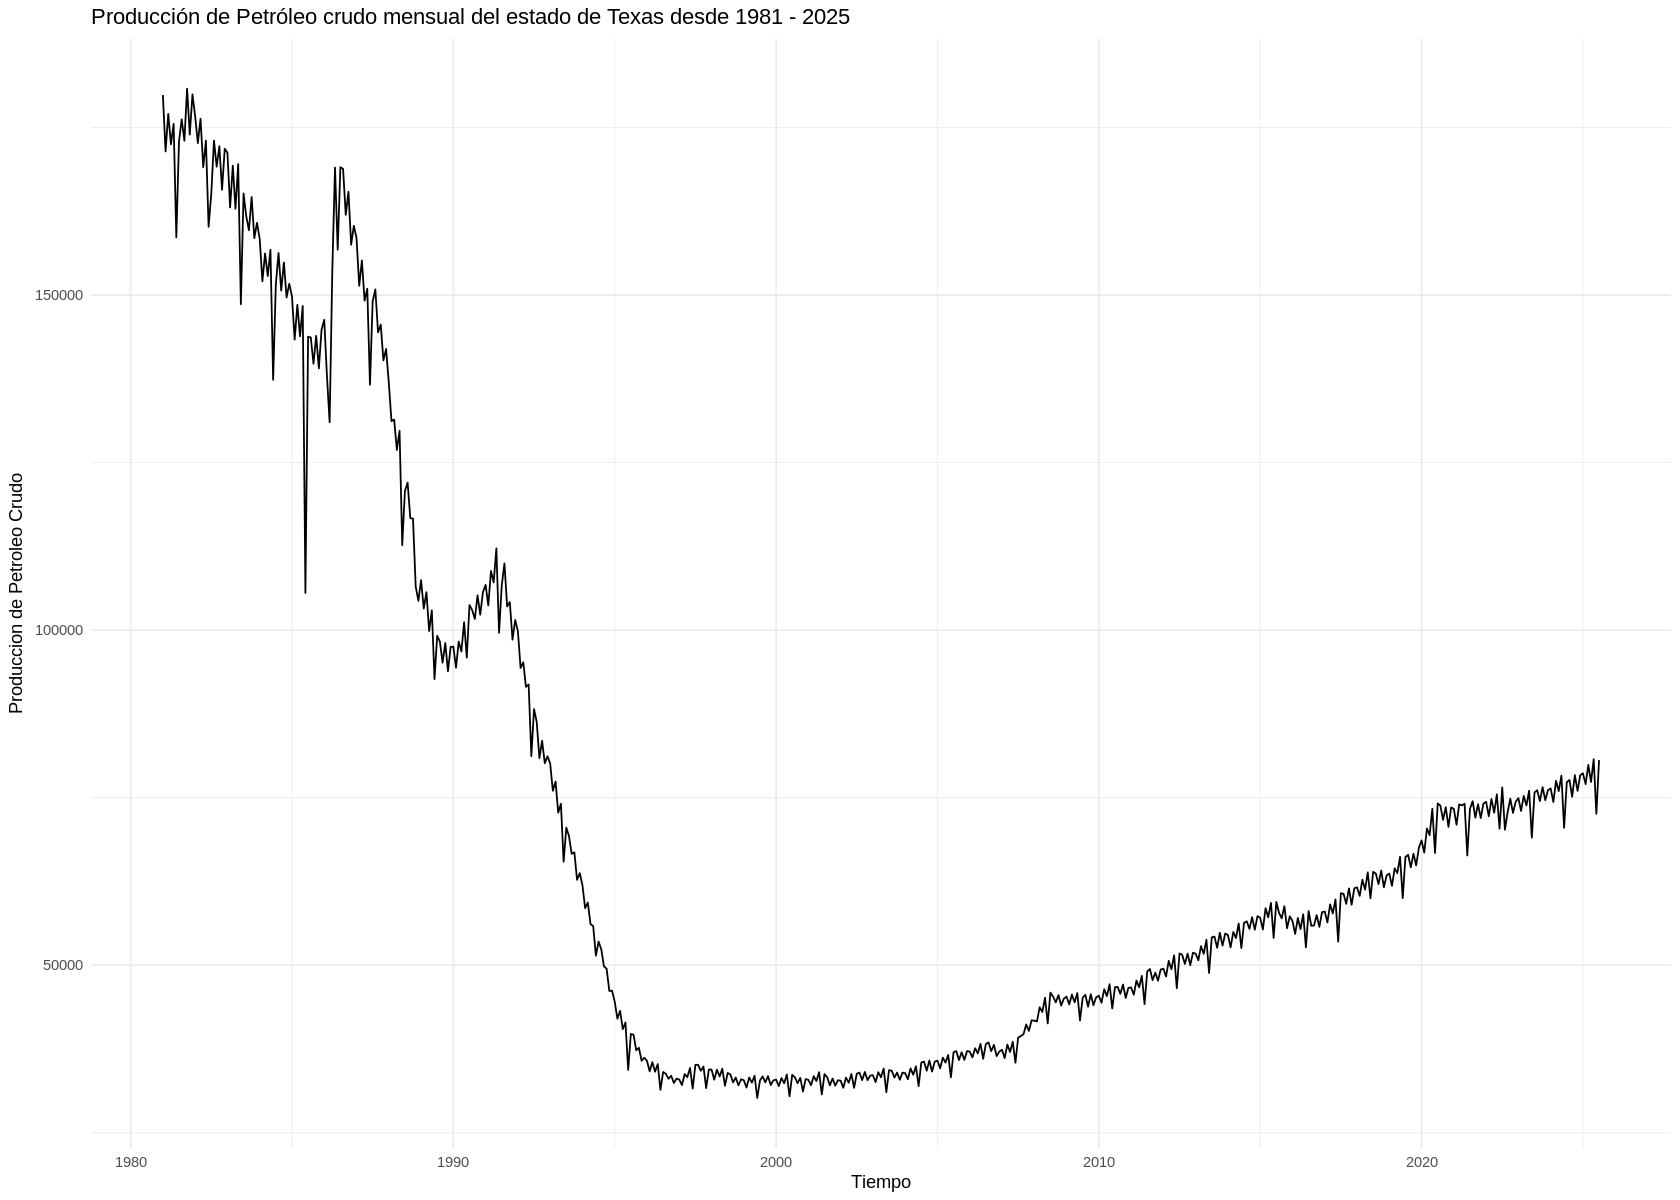

In [ ]:
# Plot the 'ts' object using autoplot()
autoplot(oil_ts) +
  labs(title = "Producción de Petróleo crudo mensual del estado de Texas desde 1981 - 2025",
       x = "Tiempo",
       y = "Produccion de Petroleo Crudo") +
  theme_minimal()

In [ ]:
oil_ts2 = window(oil_ts, start = 2020, end = c(2024, 12))
oil_ts2

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,68621,66802,70407,69397,73344,66752,74135,73822,71690,73585,70643,73533
2021,73337,70958,74004,73839,74105,66371,73331,74466,72024,74016,71958,74123
2022,74382,72228,74806,72756,75510,70374,76531,70211,72827,74850,72726,74393
2023,74932,73020,75263,73833,76046,69034,75776,76102,74496,76561,74624,76110
2024,76378,74349,77507,75983,78298,70503,77306,77640,75135,78364,76017,78356


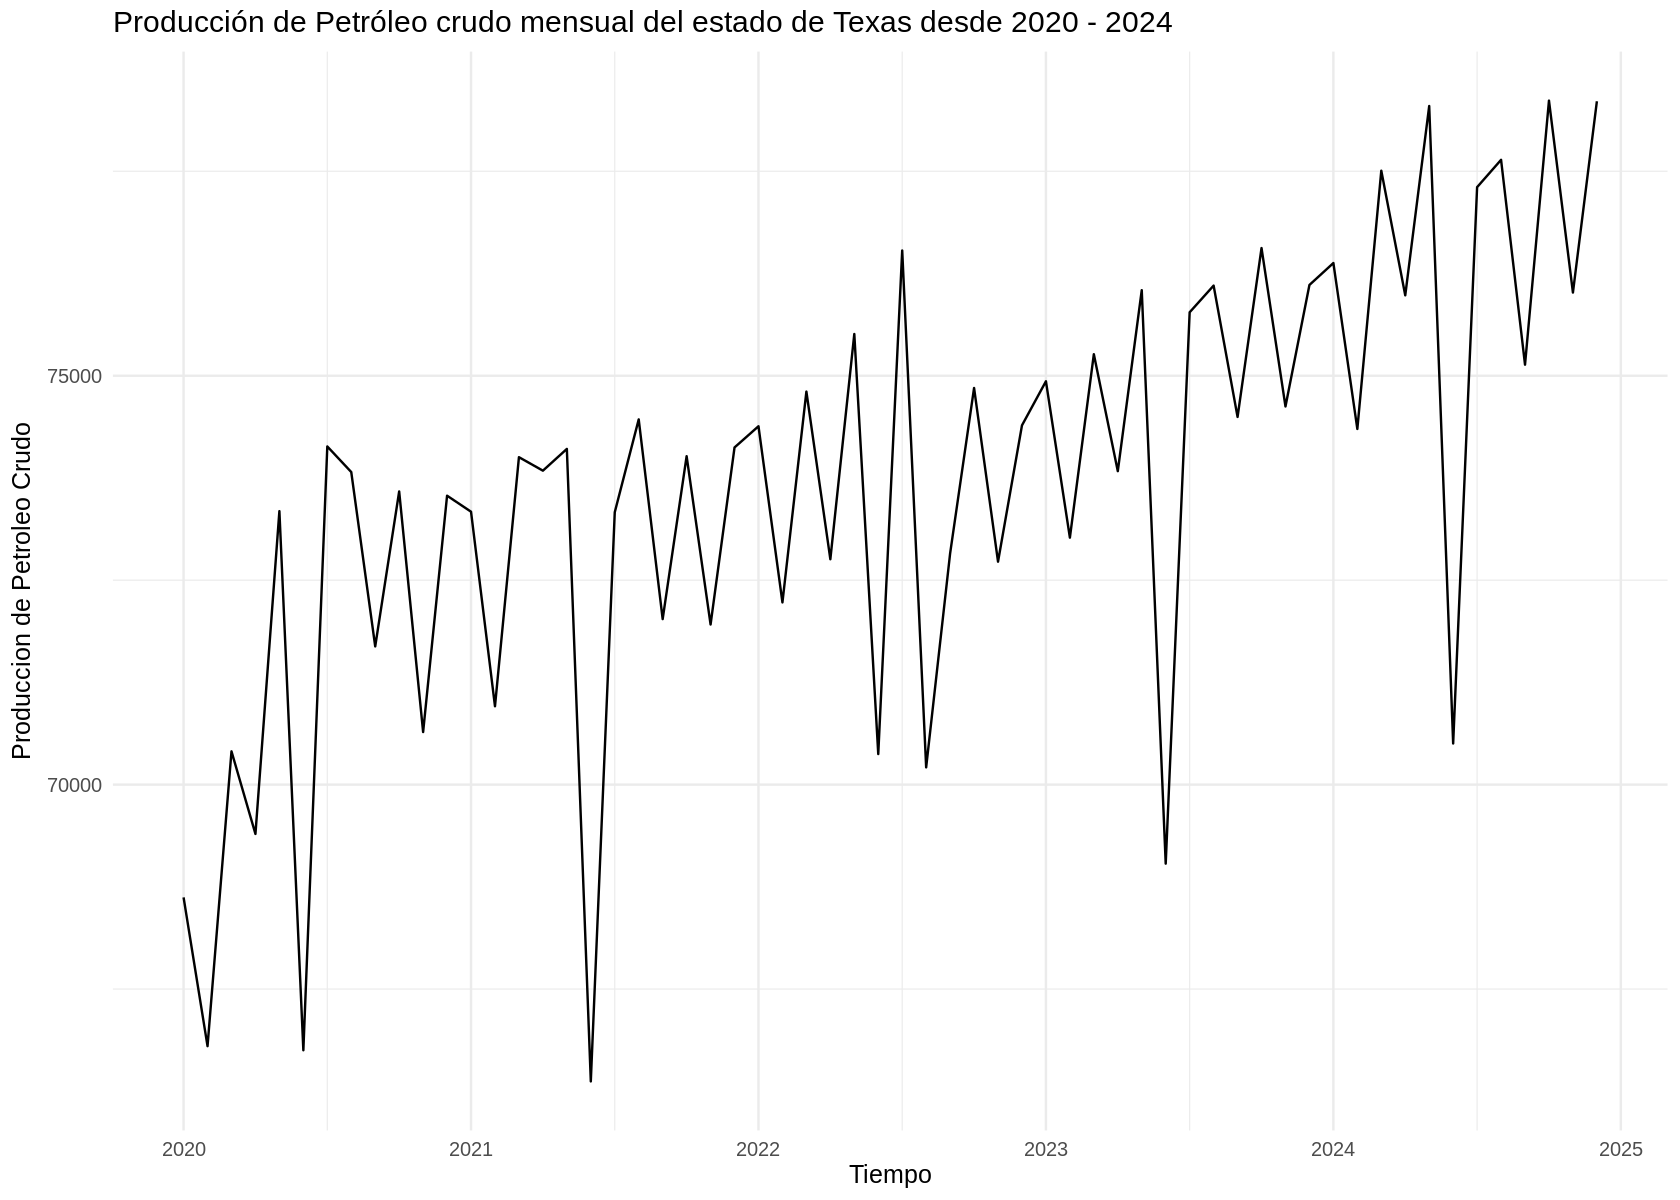

In [ ]:
autoplot(oil_ts2) +
  ggtitle("Producción de Petróleo crudo mensual del estado de Texas desde 2020 - 2024") +
  xlab("Tiempo") +
  ylab("Produccion de Petroleo Crudo") +
  theme_minimal(base_size = 15)

### Chequearemos primero si la serie es estacionaria.

In [ ]:
install.packages("tseries")
library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Realizamos la prueba Dickey-Fuller Aumentada
adf.test(oil_ts2)

Warning message in adf.test(oil_ts2):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  oil_ts2
Dickey-Fuller = -4.6744, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


El hecho de que nos de un valor negativo junto con un p-valor pequeño nos esta indicando de que la la serie es estacionaria bajo la prueba Dickey-Fuller

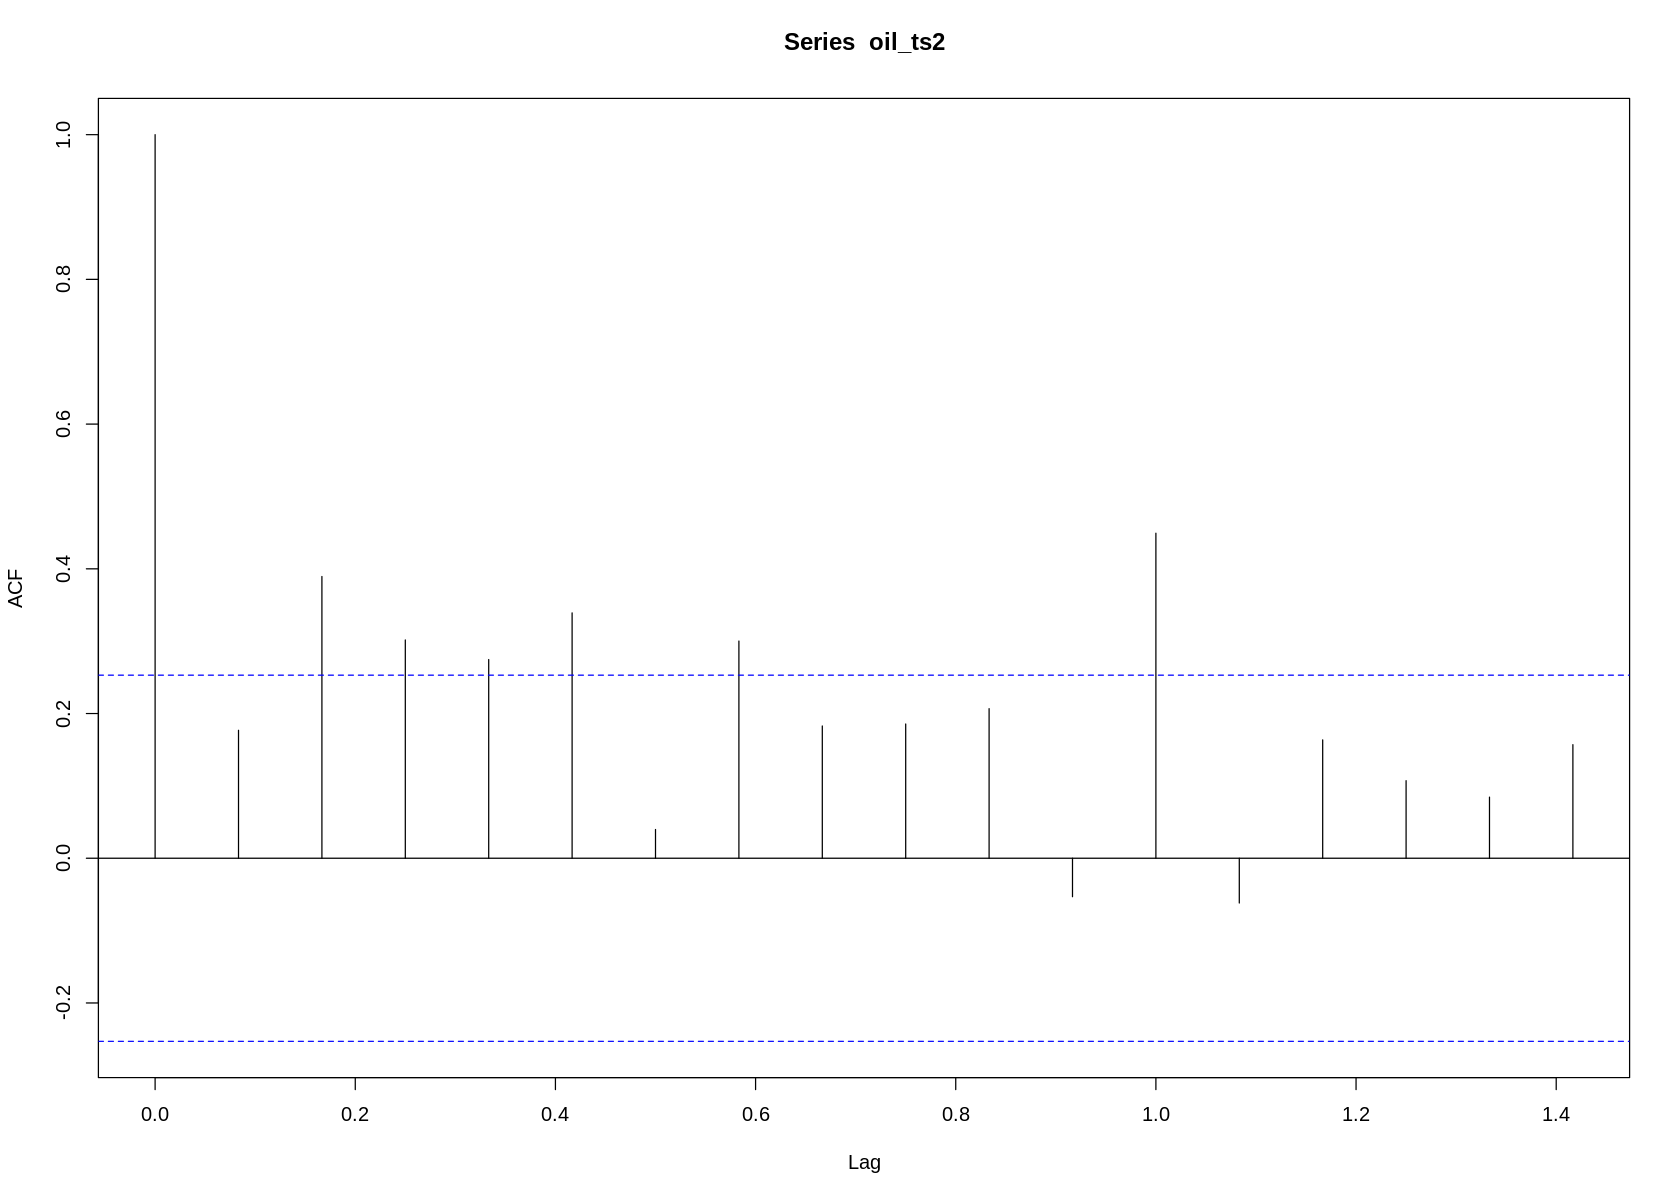

In [ ]:
acf(oil_ts2)

Podemos apreciar cierto decaimiento aunque sea lento y erratico por lo que parece ser un modelo ARMA,sin diferenciacion dado que la serie es estacionaria. Pero ese pico que aparece para el retardo 12 podria indicar cierta estacionalidad

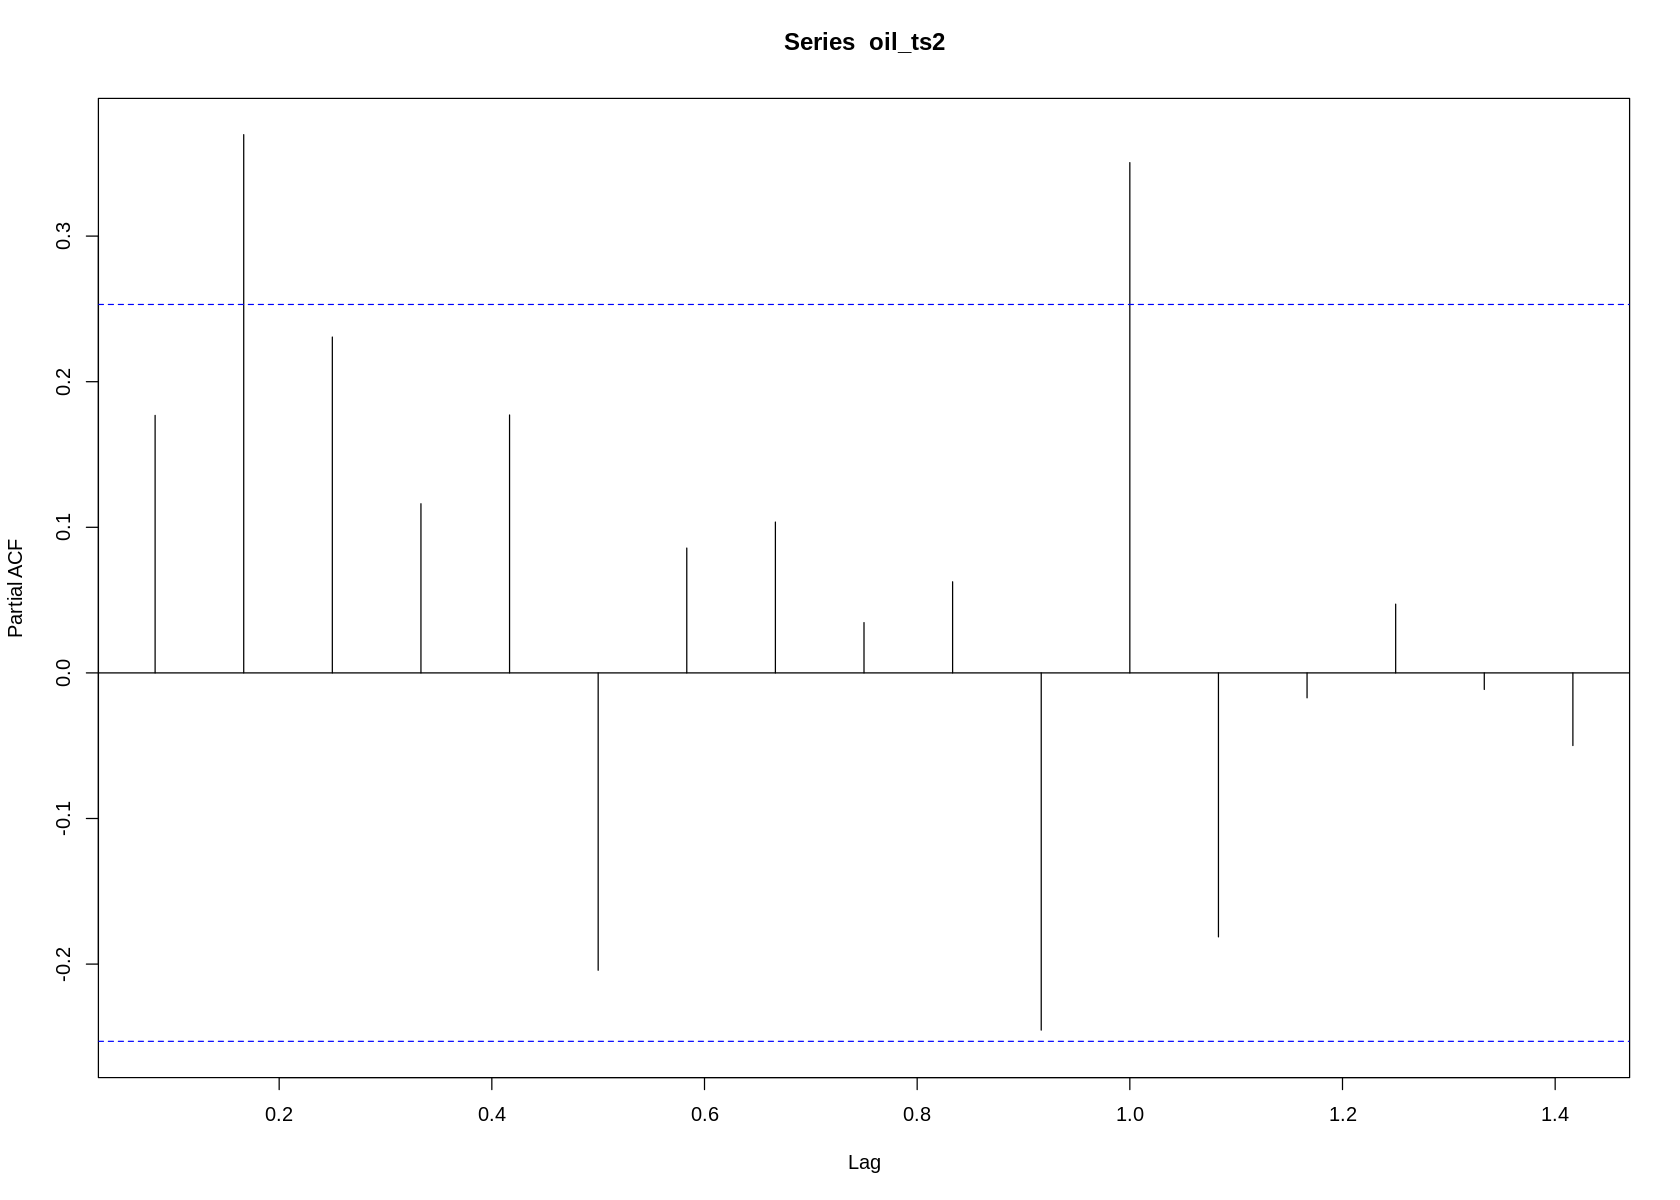

In [ ]:
pacf(oil_ts2)

El decaimiento erratico en esta grafica junta con la del ACF nos parece indicar un modelo ARMA, nos queda indentificar bien el orden. Ademas como se menciono con el ACF, los picos que aparecen alrededor del retardo 11 y 12 parecieran indicar una estacionalidad.

 Por lo que realizaremos una diferenciacion estacional para eliminar esa componente

In [ ]:
#Hacemos una diferenciacion estacional para eliminar ese posible componente estacional que parece estar molestando
oil_diff = diff(oil_ts2, lag = 12)

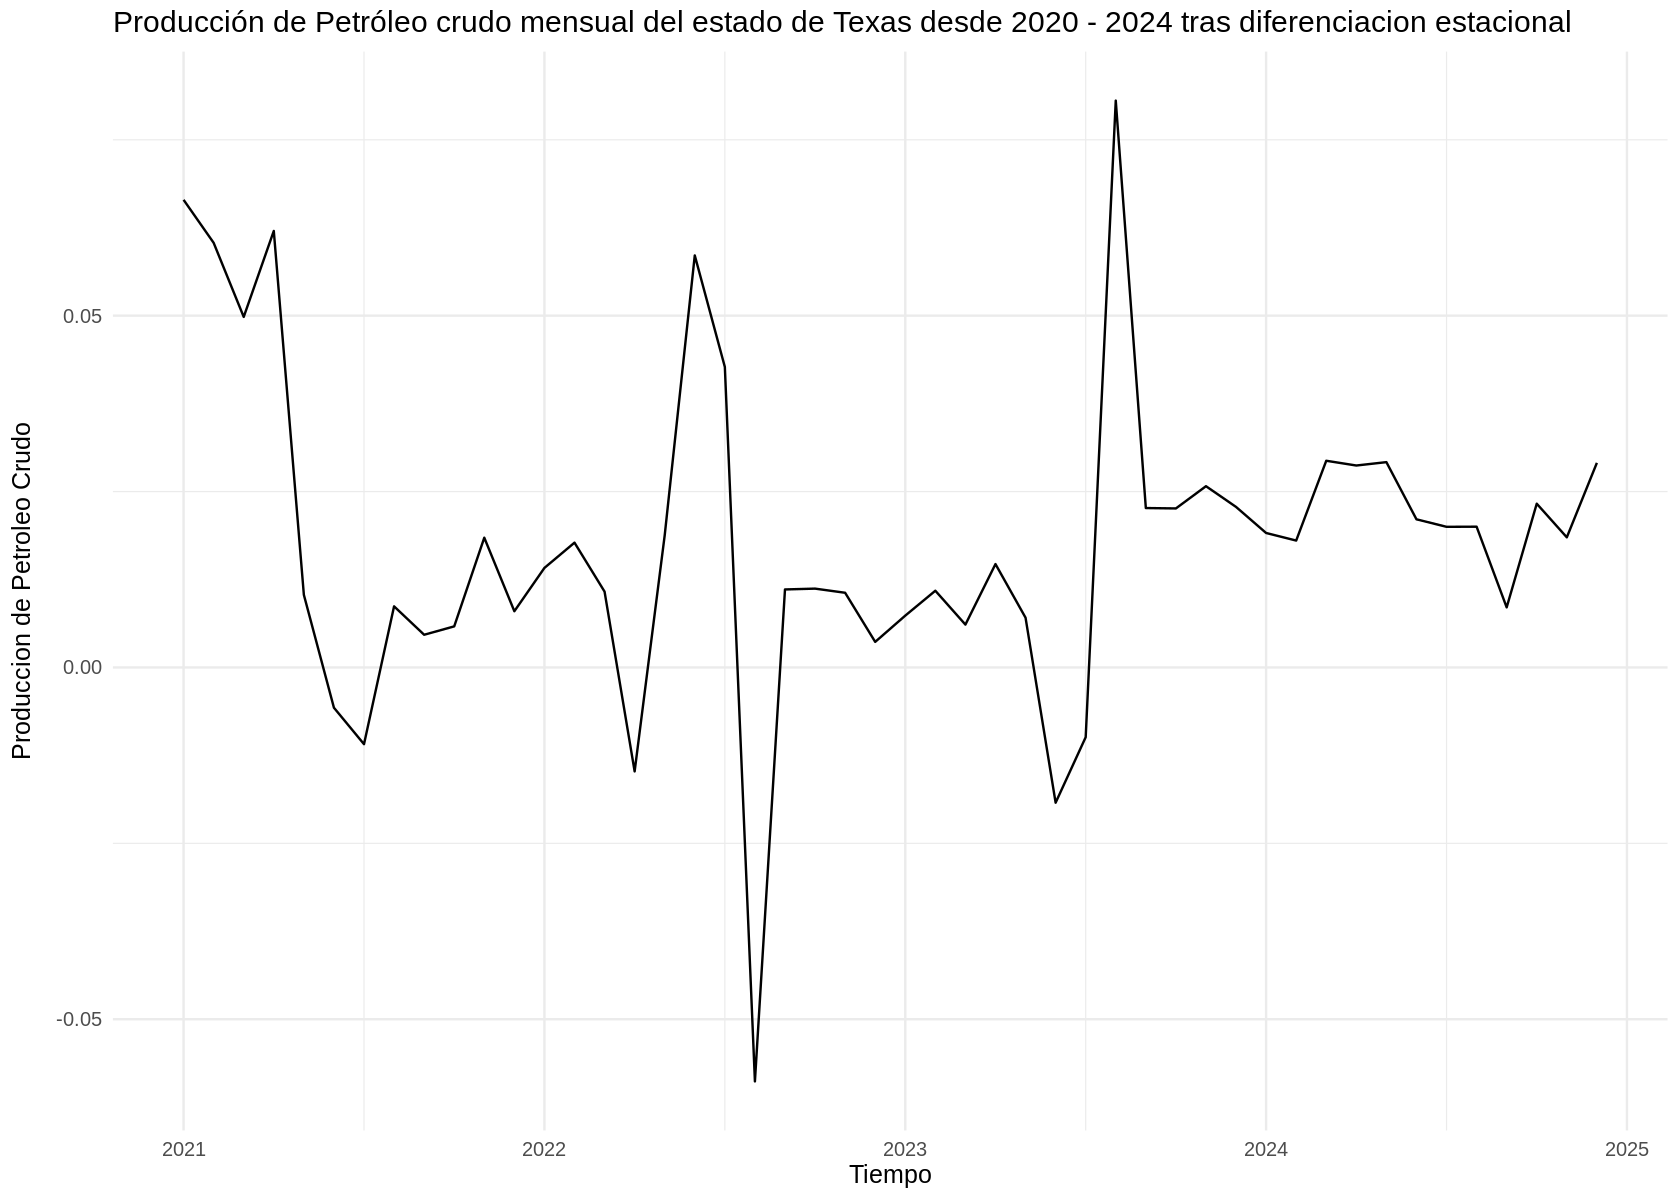

In [ ]:
autoplot(oil_diff) +
  ggtitle("Producción de Petróleo crudo mensual del estado de Texas desde 2020 - 2024 tras diferenciacion estacional") +
  xlab("Tiempo") +
  ylab("Produccion de Petroleo Crudo") +
  theme_minimal(base_size = 15)

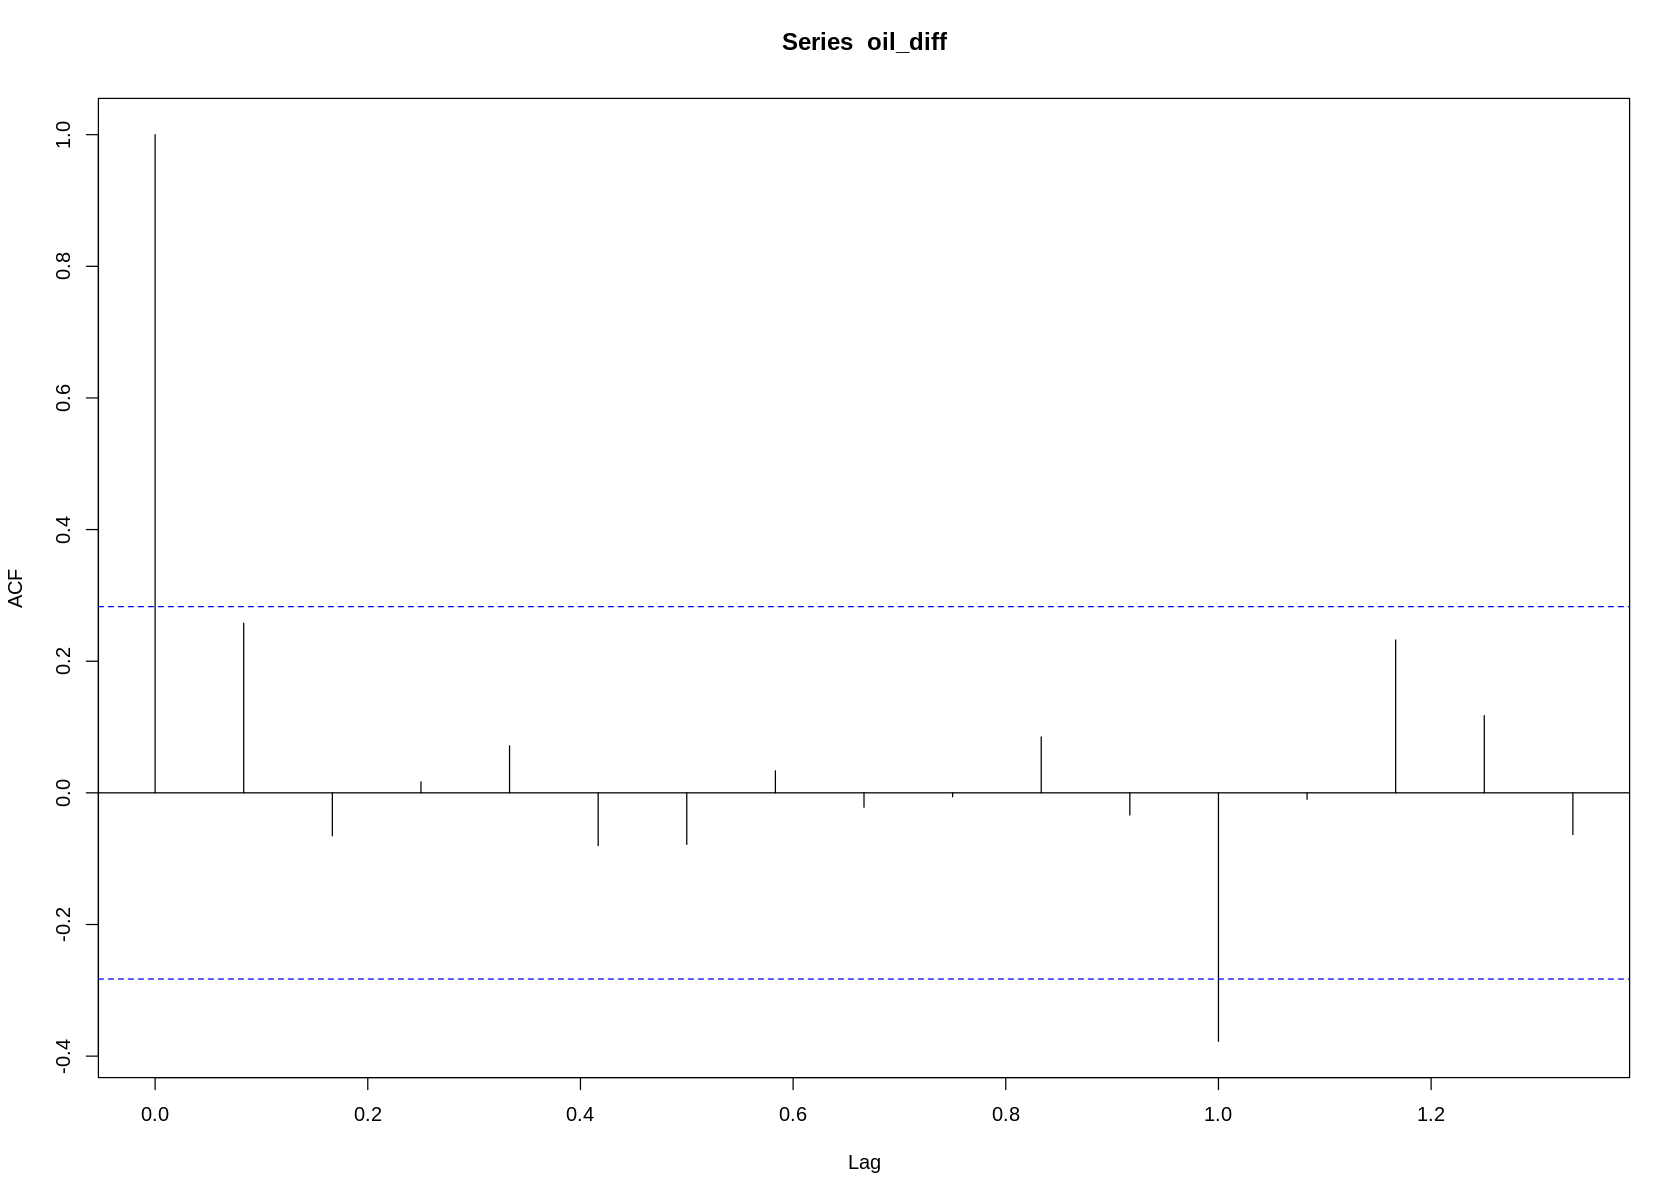

In [ ]:
acf(oil_diff)

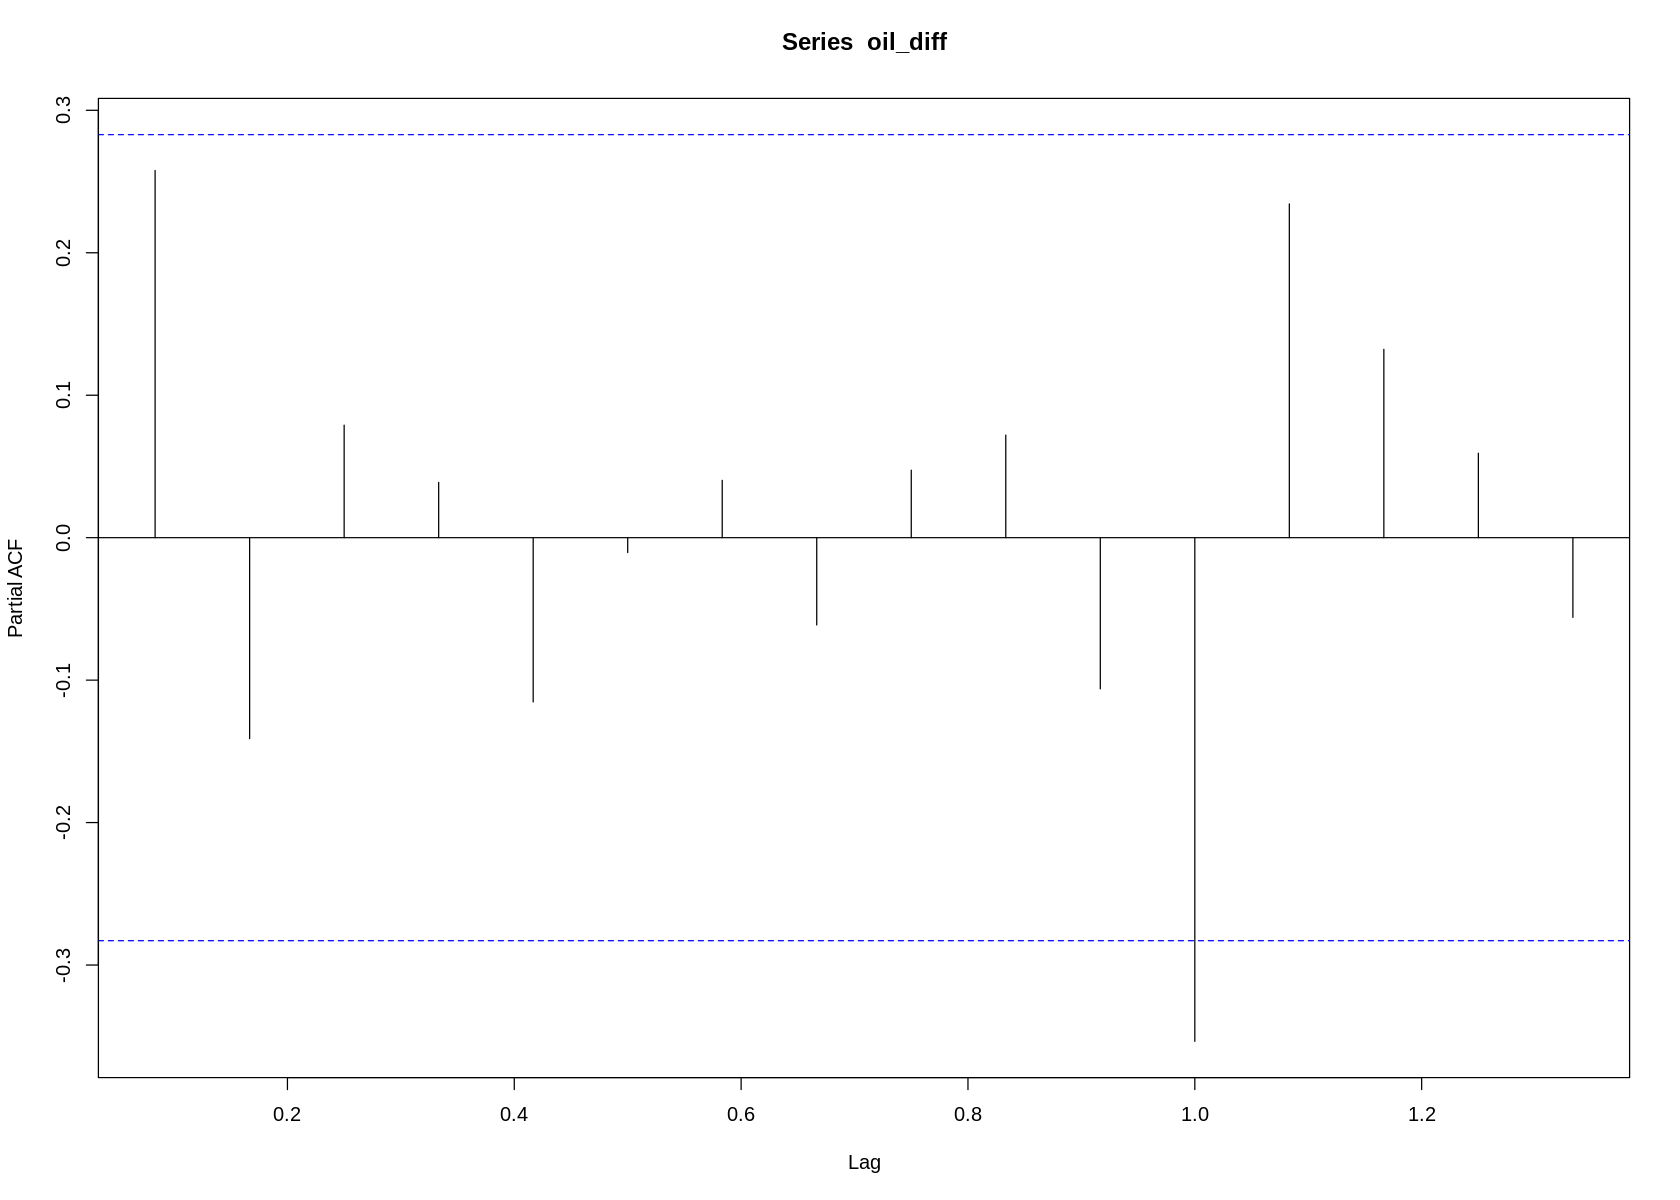

In [ ]:
pacf(oil_diff)

Estos nuevo graficos nos dicen que podriamos necesitar hacer una segunda diferenciacion estacional

Por suerte, R incluye una funcion que nos puede ser de gran ayuda para esto.

De momento creemos que puede ser un SARIMA(p, 0, 1)(1, 1, 0)(12). Dado que vemos autoregresion en los graficos pero no sabemos el orden, y necesita una diferenciacion estacional por el pico que vemos en el retardo 12 en ambos graficos. Veamos que tan correcta estaba nuestra intuicion, Utilizando la funcion auto.arima

In [ ]:
#Usamos la funcion auto.arima para ver cual es el modelo que nos recomienda R para nuestros datos
modelo_auto = auto.arima(oil_ts2)
modelo_auto

Series: oil_ts2 
ARIMA(1,0,0)(1,1,0)[12] with drift 

Coefficients:
         ar1     sar1   drift
      0.3505  -0.4571  0.0015
s.e.  0.1437   0.1212  0.0003

sigma^2 = 0.0004348:  log likelihood = 119.65
AIC=-231.29   AICc=-230.36   BIC=-223.81

De manera que el modelo que mejor parece ajustarse a nuestro datos es un Modelo SARIMA (1,0,0)(1,1,0)(12) con drift

## Modelo 1 SARIMA(1,0,0)(1,1,0)[12]

In [ ]:
#Ajustamos el modelo. Lambda = 0 para indicarle una transformacion logaritmica
modelo_sarima1 = Arima(oil_ts2, order=c(1, 0, 0), seasonal=c(1, 1, 0), include.drift = TRUE, lambda = 0)
summary(modelo_sarima1)

Series: oil_ts2 
ARIMA(1,0,0)(1,1,0)[12] with drift 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1     sar1   drift
      0.3505  -0.4571  0.0015
s.e.  0.1437   0.1212  0.0003

sigma^2 = 0.0004348:  log likelihood = 119.65
AIC=-231.29   AICc=-230.36   BIC=-223.81

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 160.3245 1318.702 929.2286 0.2107777 1.274365 0.5551708 0.04767266


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0)(1,1,0)[12] with drift
Q* = 6.6224, df = 10, p-value = 0.7605

Model df: 2.   Total lags used: 12



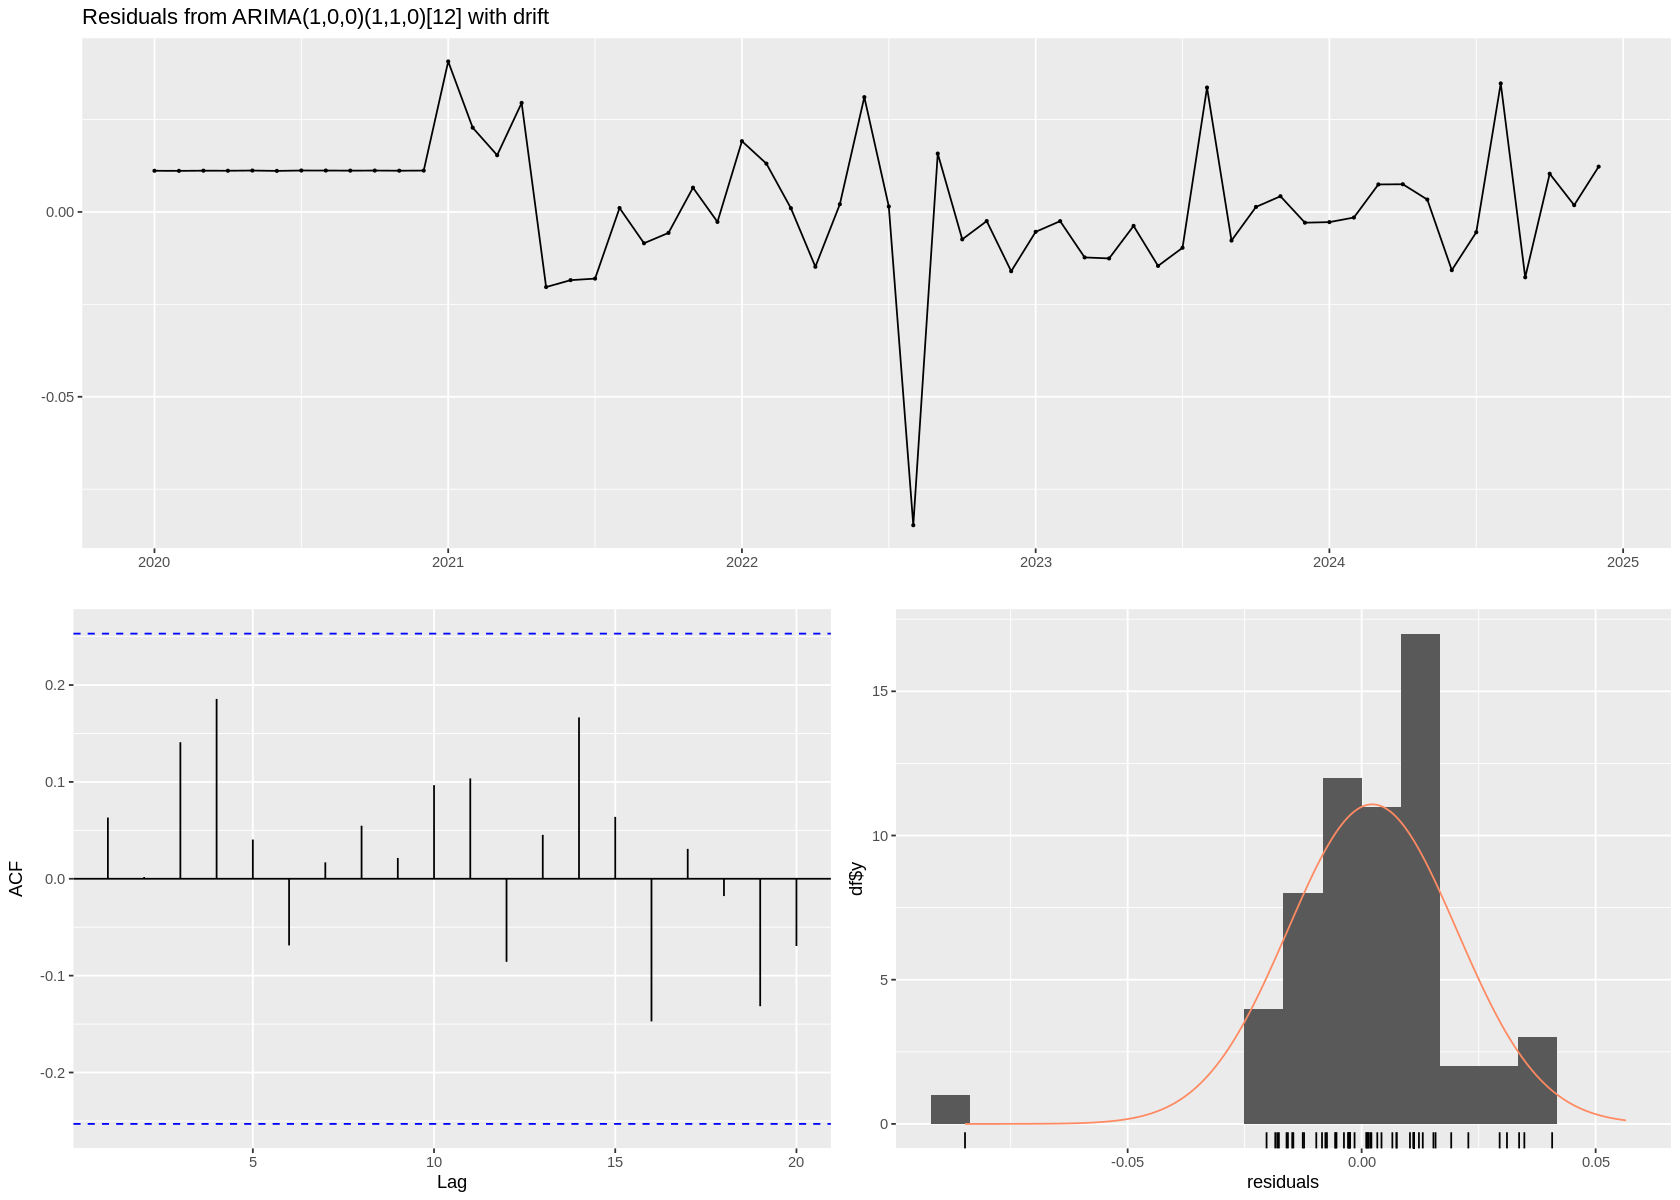

In [ ]:
#@title Chequeamos los residuos
checkresiduals(modelo_sarima1)

In [ ]:
#Ahora pasemos a predecir los datos usando nuestros dos modelos
prediccion1 = forecast(modelo_sarima1, h = 12)

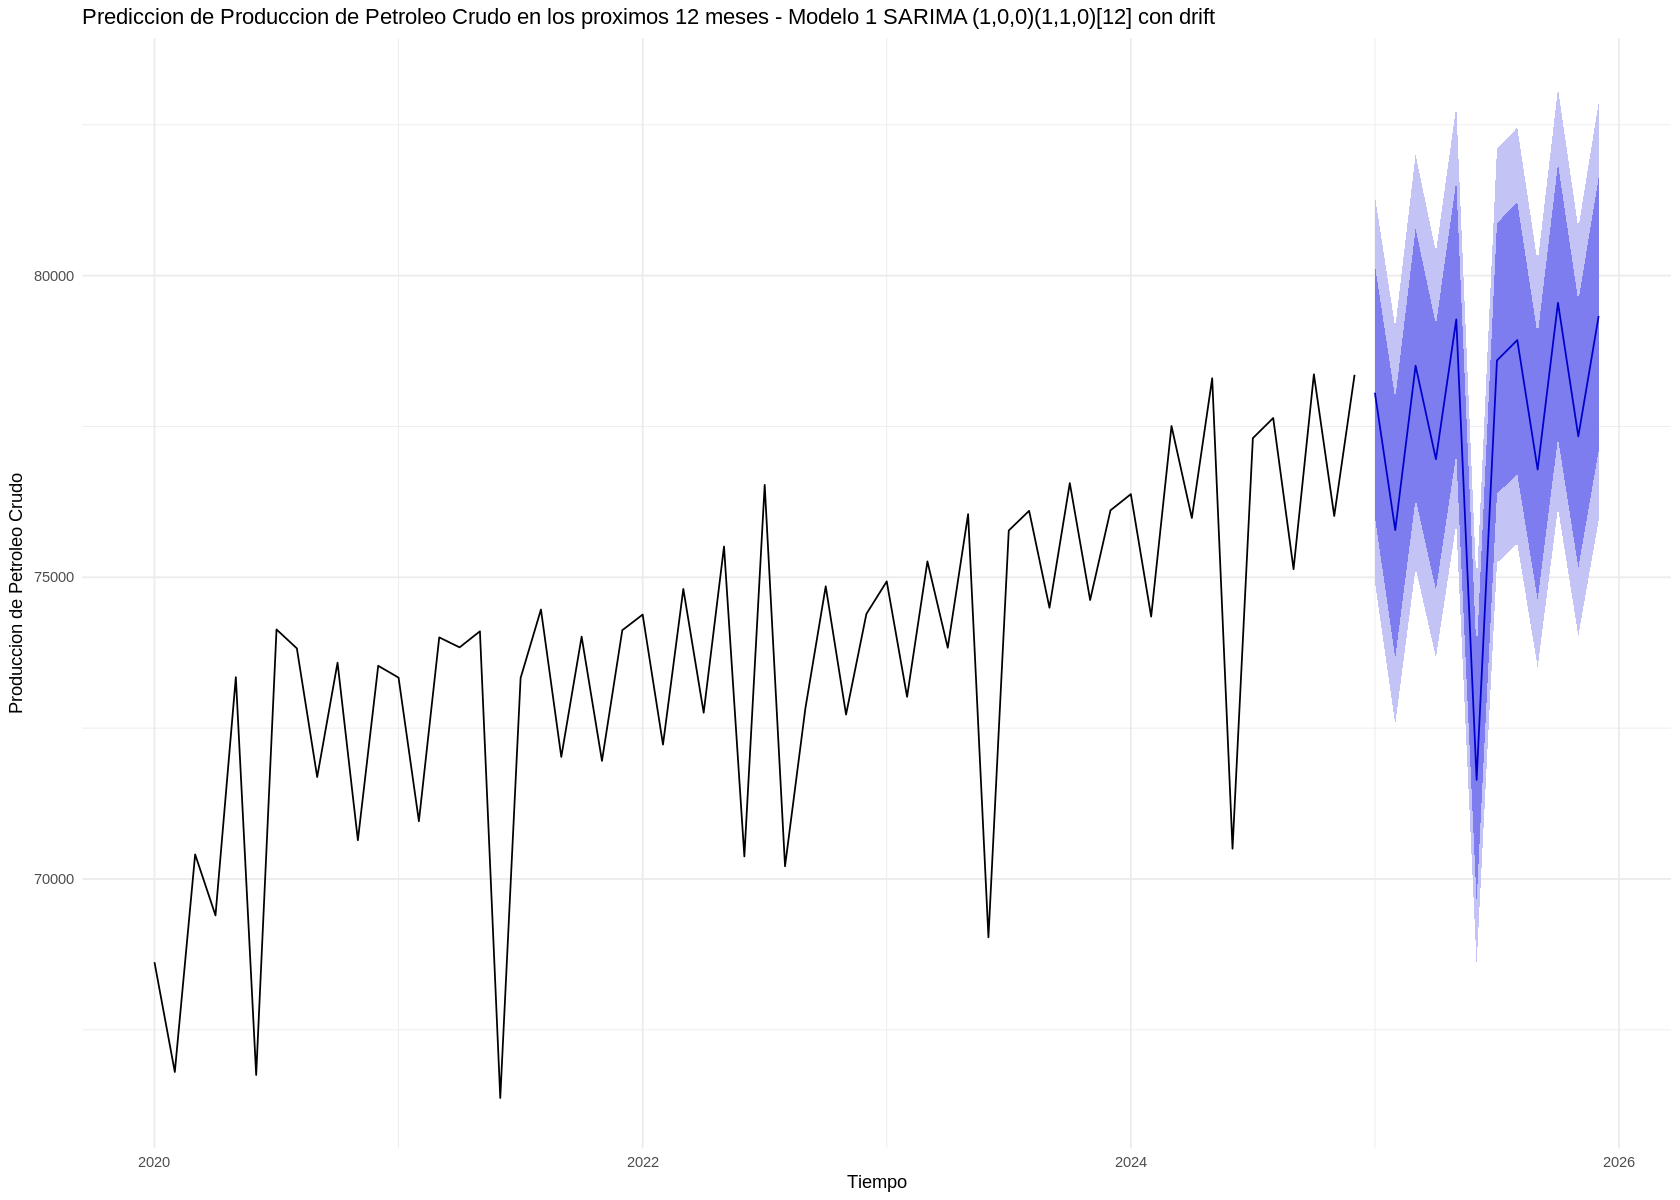

In [ ]:
#Graficamos los valores predichos por el primer modelo
autoplot(prediccion1) +
  ggtitle("Prediccion de Produccion de Petroleo Crudo en los proximos 12 meses - Modelo 1 SARIMA (1,0,0)(1,1,0)[12] con drift") +
  xlab("Tiempo") +
  ylab("Produccion de Petroleo Crudo") +
  theme_minimal()

In [ ]:
prediccion1

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2025       78059.01 76000.58 80173.20 74932.98 81315.46
Feb 2025       75783.15 73667.19 77959.90 72571.08 79137.39
Mar 2025       78506.56 76300.07 80776.86 75157.24 82005.14
Apr 2025       76956.83 74792.16 79184.15 73671.01 80389.20
May 2025       79273.32 77043.27 81567.92 75888.27 82809.37
Jun 2025       71643.51 69628.07 73717.29 68584.22 74839.27
Jul 2025       78593.54 76382.59 80868.50 75237.47 82099.32
Aug 2025       78931.99 76711.51 81216.74 75561.46 82452.86
Sep 2025       76786.61 74626.48 79009.26 73507.69 80211.79
Oct 2025       79548.86 77311.03 81851.47 76151.99 83097.25
Nov 2025       77335.23 75159.67 79573.76 74032.88 80784.88
Dec 2025       79329.88 77098.21 81626.15 75942.36 82868.50

In [ ]:
reales_prediccion = window(oil_ts, start = c(2025, 1), end = c(2025, 7))
reales_prediccion


,Jan,Feb,Mar,Apr,May,Jun,Jul
2025,78640,77030,79890,77344,80734,72591,80609


In [ ]:
#Calculamos el error cuadratico medio RMSE
sqrt(mean((prediccion1$mean[1:7] - reales_prediccion)^2))

[1] 1256.376

In [ ]:
#Calculamos ahora el error Error Porcentual Medio Absoluto MAPE
mean(abs((prediccion1$mean[1:7] - reales_prediccion)/ reales_prediccion))*100

[1] 0.1304646

## Modelo 2 SARIMA(1,0,1)(1,1,1)[12] con drift

Probemos ahora con un modelo SARIMA(1,0,1)(1,1,1)(12)

In [ ]:
#Ajustamos nuestro segundo modelo agregando drift y lambda = 0 para indicarle una transformacion logaritmica
modelo_sarima2 = Arima(oil_ts2, order = c(1, 0, 1), seasonal = c(1, 1, 1), include.drift = TRUE, lambda = 0)
summary(modelo_sarima2)

Series: oil_ts2 
ARIMA(1,0,1)(1,1,1)[12] with drift 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1     ma1     sar1     sma1   drift
      0.3116  0.1055  -0.1565  -0.9998  0.0014
s.e.  0.4986  0.5137   0.1693   0.2992  0.0002

sigma^2 = 0.000259:  log likelihood = 124.9
AIC=-237.8   AICc=-235.76   BIC=-226.58

Training set error measures:
                   ME     RMSE      MAE      MPE      MAPE      MASE      ACF1
Training set 159.0899 988.9655 720.9915 0.216591 0.9909342 0.4307588 0.0773058

Tenemos un AIC y BIC menor que el modelo elegido por la funcion auto.arima por lo que parece ser superior a los otros, probemos ahora su capacidad de prediccion.


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(1,1,1)[12] with drift
Q* = 9.584, df = 8, p-value = 0.2954

Model df: 4.   Total lags used: 12



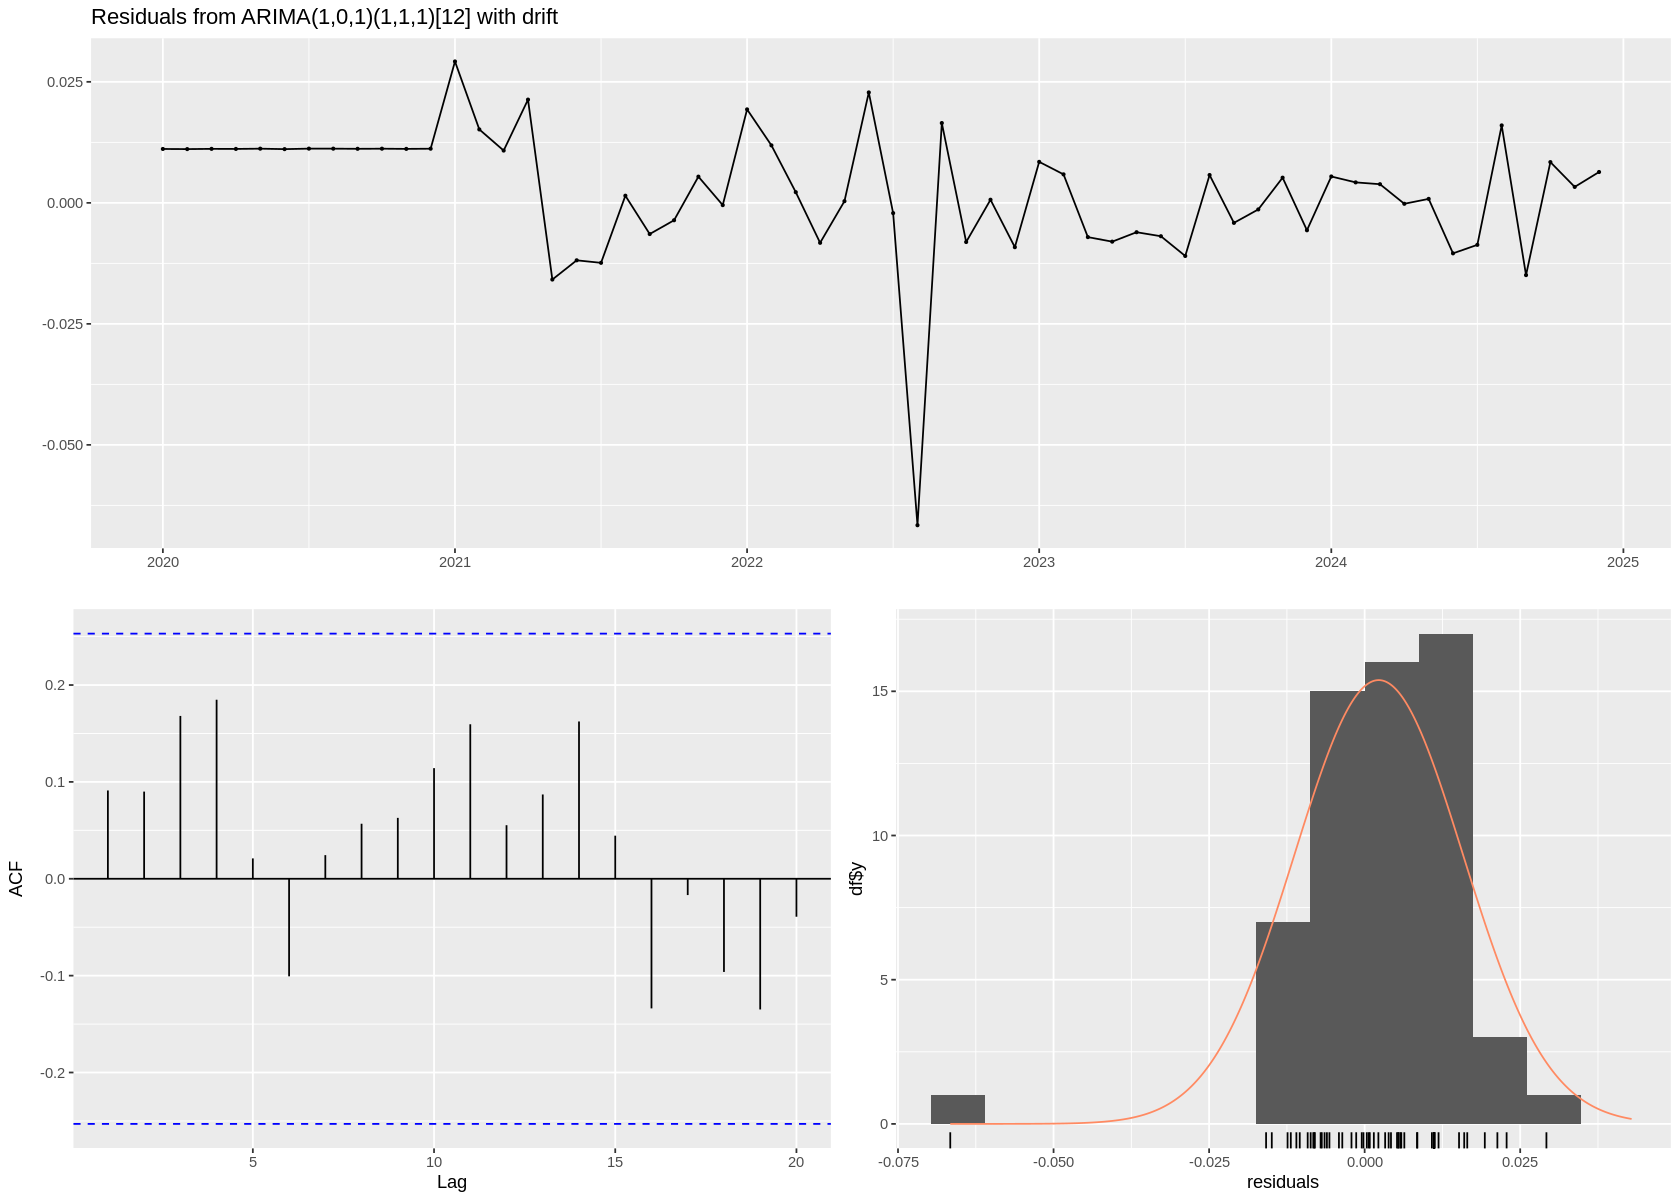

In [ ]:
#@title Chequeamos los residuos
checkresiduals(modelo_sarima2)

In [ ]:
#Predecimos los datos con nuestro tercer modelo
prediccion2 = forecast(modelo_sarima2, h = 12)

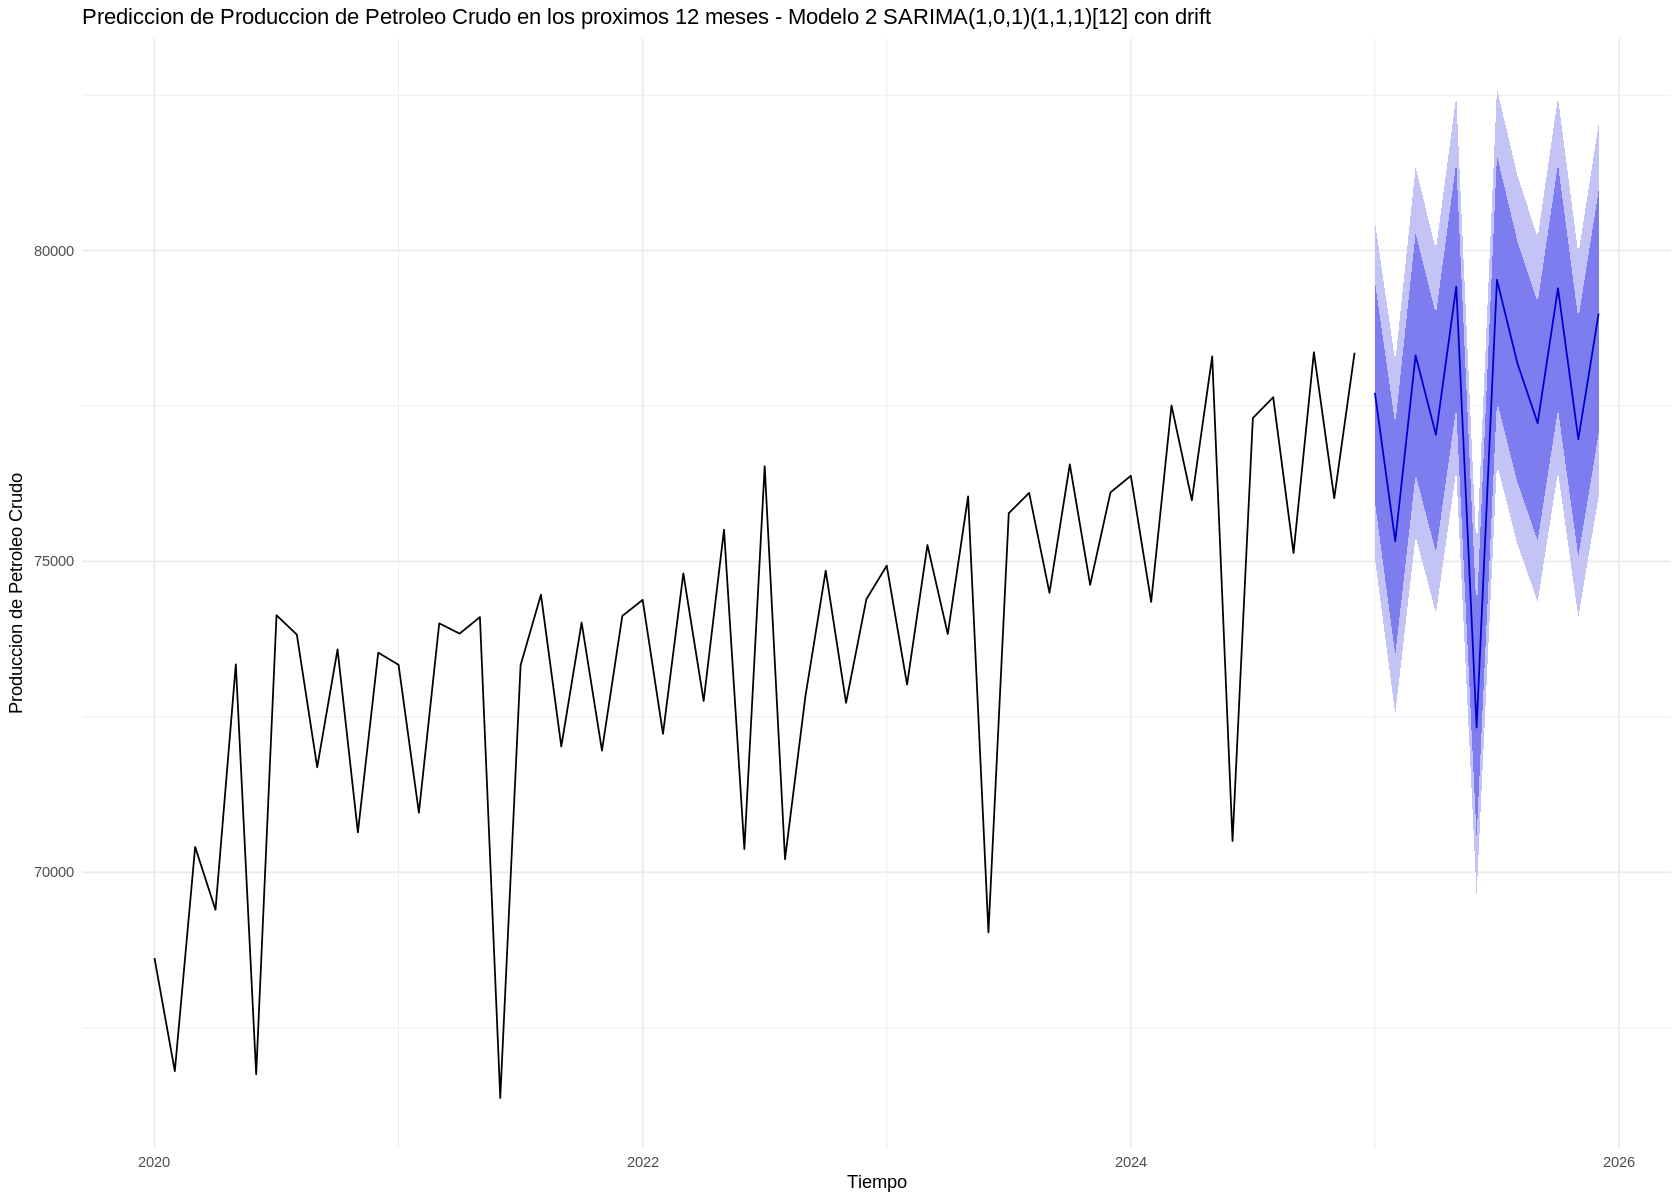

In [ ]:
#@title Grafica Modelo 2 SARIMA(1,0,1)(1,1,1)[12] con drift
#Graficamos los valores predichos por el tercer modelo
autoplot(prediccion2) +
  ggtitle("Prediccion de Produccion de Petroleo Crudo en los proximos 12 meses - Modelo 2 SARIMA(1,0,1)(1,1,1)[12] con drift") +
  xlab("Tiempo") +
  ylab("Produccion de Petroleo Crudo") +
  theme_minimal()

In [ ]:
#Calculamos el error cuadratico medio RMSE
sqrt(mean((prediccion2$mean[1:7] - reales_prediccion)^2))

[1] 1153.199

In [ ]:
#Calculamos ahora el error Error Porcentual Medio Absoluto MAPE
mean(abs((prediccion2$mean[1:7] - reales_prediccion)/ reales_prediccion))*100

[1] 1.29886

In [ ]:
prediccion2$mean

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2025,77710.95,75325.67,78312.79,77037.74,79420.23,72328.48,79529.69,78193.18,77223.55,79393.40,76965.10,78988.33


In [ ]:
reales_prediccion

,Jan,Feb,Mar,Apr,May,Jun,Jul
2025,78640,77030,79890,77344,80734,72591,80609


Hemos conseguido reducir aun mas el error. Por lo que el tercer modelo es el mas efectivo para nuestros datos.

## Modelo 3 SARIMA(1,0,1)(2,1,1)[12]

Por pura curiosidad vamos a intentar un cuarto modelo, un SARIMA(1,0,1)(2,1,1)[12]

In [ ]:
#Ajustamos nuestro tercer modelo. No se incluye drift porque hay diferenciacion de orden 2
modelo_sarima3 = Arima(oil_ts2, order = c(1, 0, 1), seasonal = c(2, 1, 1), lambda = 0, include.drift = TRUE)
summary(modelo_sarima3)

Series: oil_ts2 
ARIMA(1,0,1)(2,1,1)[12] with drift 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1     ma1     sar1     sar2     sma1   drift
      0.4949  0.0958  -0.7954  -0.7355  -0.6367  0.0014
s.e.  0.3121  0.3290   0.2047   0.1526   0.8968  0.0002

sigma^2 = 0.0001621:  log likelihood = 129.7
AIC=-245.4   AICc=-242.6   BIC=-232.3

Training set error measures:
                   ME     RMSE      MAE       MPE      MAPE      MASE      ACF1
Training set 155.8406 774.6148 605.3489 0.2181027 0.8289204 0.3616677 0.1367651

Presenta mejores valores de AIC y BIC, ahora veamos que tal sus errores a la hora de predecir


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(2,1,1)[12] with drift
Q* = 15.153, df = 7, p-value = 0.03409

Model df: 5.   Total lags used: 12



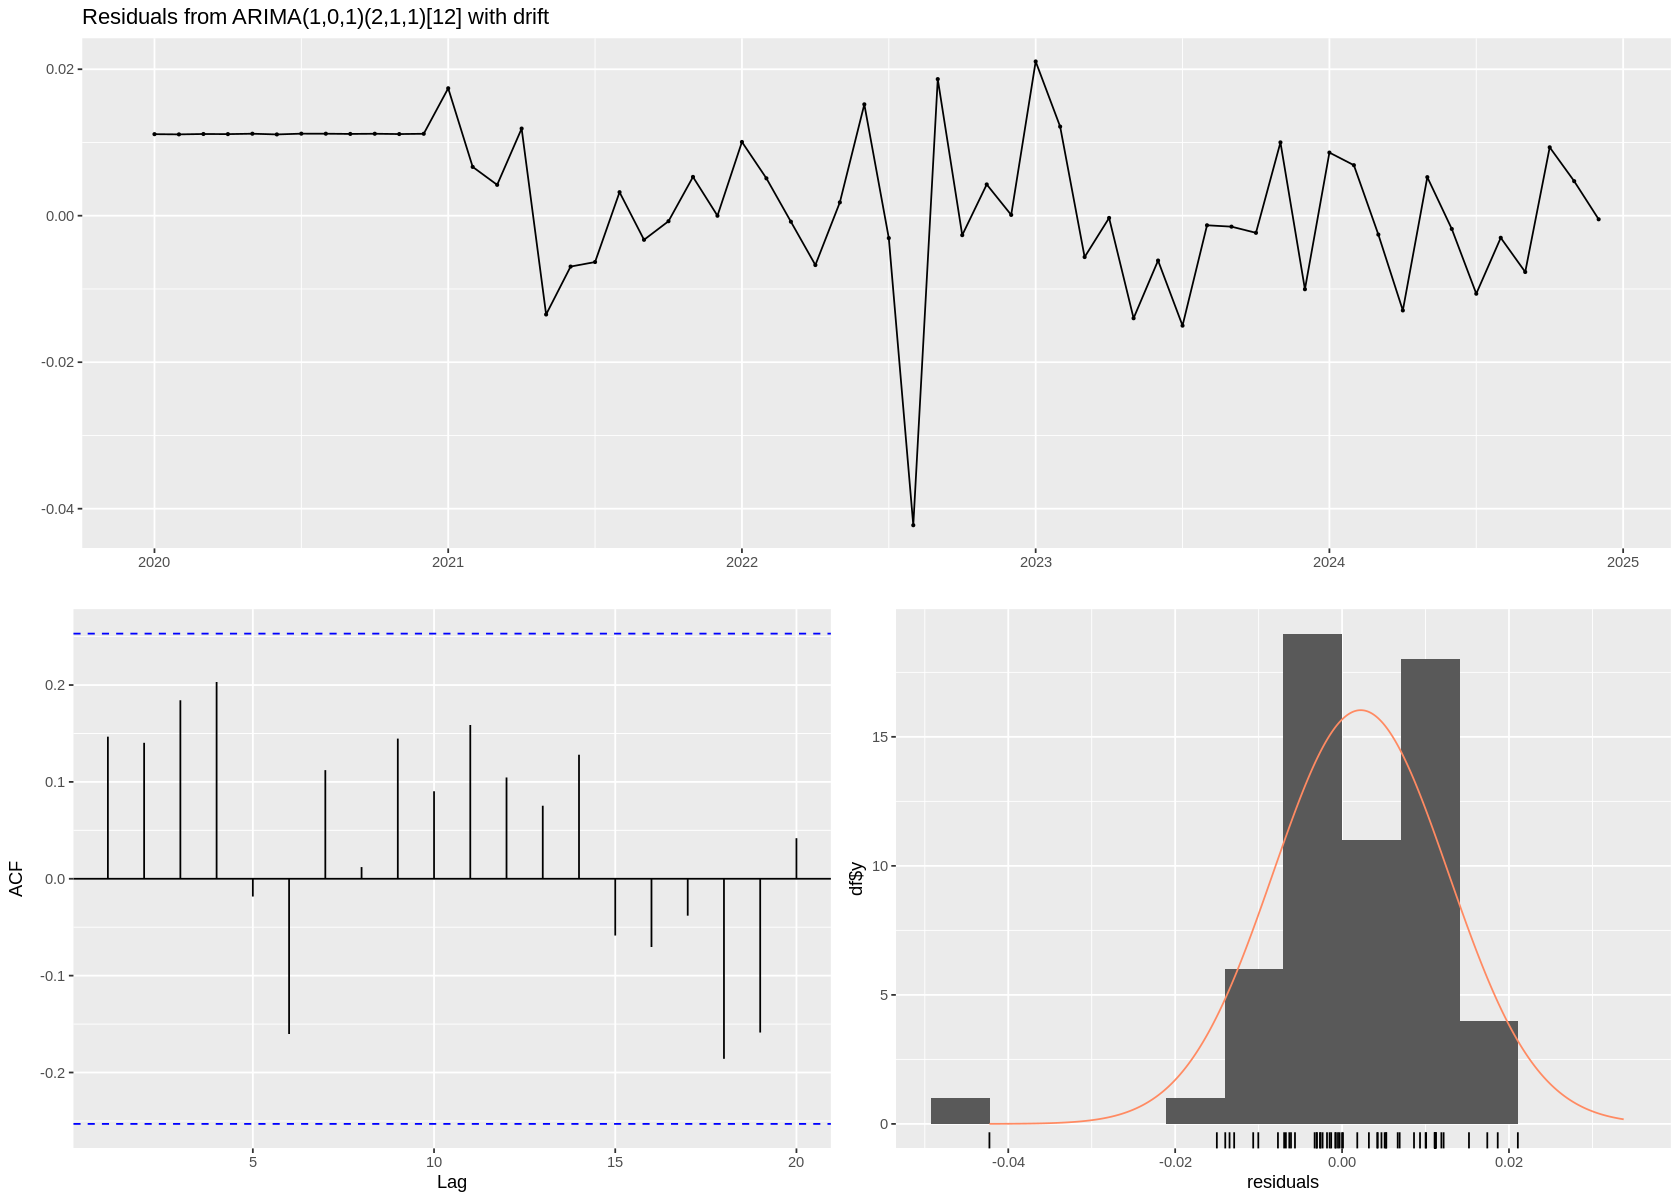

In [ ]:
#@title Chequeamos los residuos
checkresiduals(modelo_sarima3)

In [ ]:
prediccion3 = forecast(modelo_sarima3, h = 12)

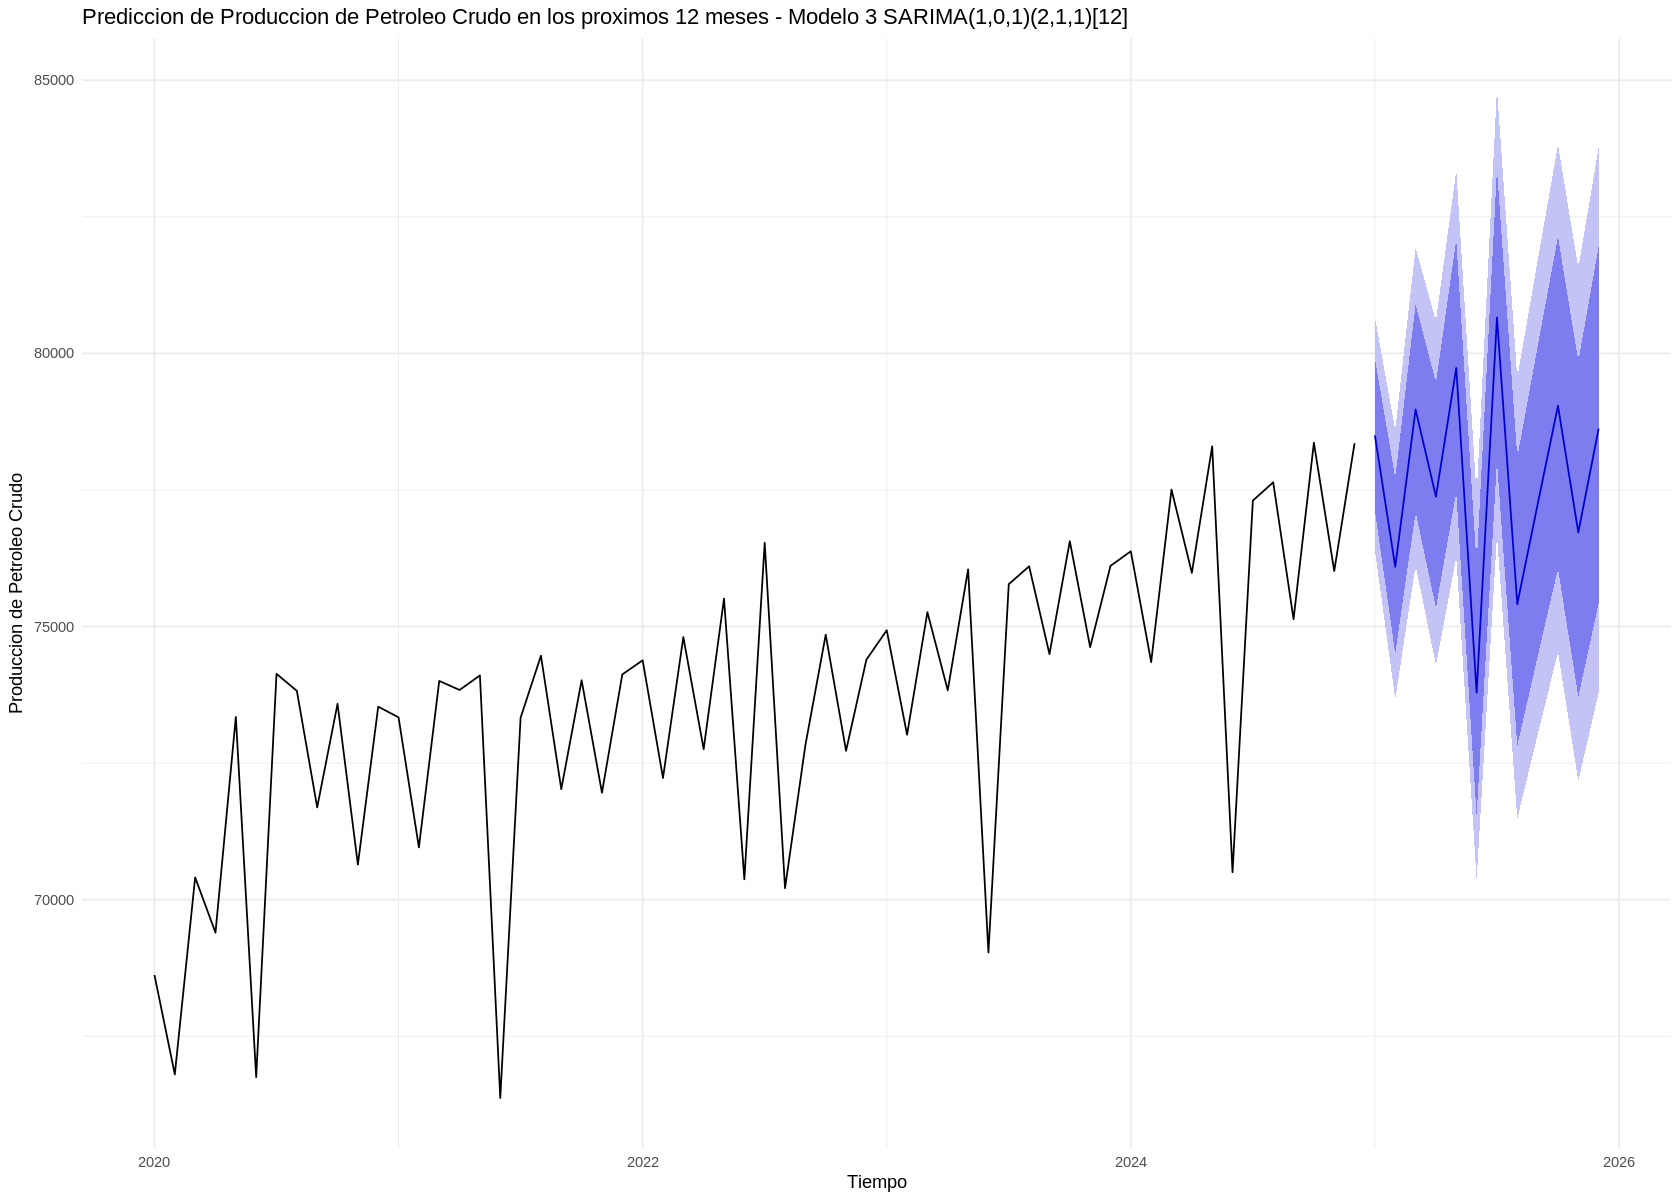

In [ ]:
#@title Grafica Modelo 3 SARIMA(1,0,1)(2,1,1)[12].
#Graficamos los valores predichos por el cuarto modelo
autoplot(prediccion3) +
  ggtitle("Prediccion de Produccion de Petroleo Crudo en los proximos 12 meses - Modelo 3 SARIMA(1,0,1)(2,1,1)[12] con drift") +
  xlab("Tiempo") +
  ylab("Produccion de Petroleo Crudo") +
  theme_minimal()

In [ ]:
#Calculamos el error cuadratico medio RMSE
sqrt(mean((prediccion3$mean[1:7] - reales_prediccion)^2))

[1] 773.2074

In [ ]:
#Calculamos ahora el error Error Porcentual Medio Absoluto MAPE
mean(abs((prediccion3$mean[1:7] - reales_prediccion)/ reales_prediccion))*100

[1] 0.7913484

Posee un mejor AIC, BIC y valores de error que los otros dos modelos

## Tabla de comparaciones

In [ ]:
tabla_comparacion = rbind(accuracy(modelo_sarima1), accuracy(modelo_sarima2), accuracy(modelo_sarima3))
rownames(tabla_comparacion) <- c("SARIMA(1,0,0)(1,1,0)[12] con drift", "SARIMA(1,0,1)(1,1,1)[12] con drift", "SARIMA(1,0,1)(2,1,1)[12] con drift")
tabla_comparacion

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
"SARIMA(1,0,0)(1,1,0)[12] con drift",160.3245,1318.7019,929.2286,0.2107777,1.2743652,0.5551708,0.04767266
"SARIMA(1,0,1)(1,1,1)[12] con drift",159.0899,988.9655,720.9915,0.2165910,0.9909342,0.4307588,0.07730580
"SARIMA(1,0,1)(2,1,1)[12] con drift",155.8406,774.6148,605.3489,0.2181027,0.8289204,0.3616677,0.13676511


In [ ]:
# Create a table with AIC and BIC values
aic_bic_table = data.frame(
  AIC = c(modelo_sarima1$aic, modelo_sarima2$aic, modelo_sarima3$aic),
  AICc = c(modelo_sarima1$aicc, modelo_sarima2$aicc, modelo_sarima3$aicc),
  BIC = c(modelo_sarima1$bic, modelo_sarima2$bic, modelo_sarima3$bic)
)

rownames(aic_bic_table) <- c("SARIMA(1,0,0)(1,1,0)[12] con drift", "SARIMA(1,0,1)(1,1,1)[12] con drift", "SARIMA(1,0,1)(2,1,1)[12] con drift")

print(aic_bic_table)

                                         AIC      AICc       BIC
SARIMA(1,0,0)(1,1,0)[12] con drift -231.2949 -230.3647 -223.8101
SARIMA(1,0,1)(1,1,1)[12] con drift -237.8043 -235.7555 -226.5771
SARIMA(1,0,1)(2,1,1)[12] con drift -245.4000 -242.6000 -232.3016
